<a href="https://colab.research.google.com/github/ashayghiya/Hackathons/blob/master/Loan%20Prediction%20-%20Analytics%20Vidhya.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Analysis

In [0]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [199]:
df = pd.read_csv(r'train.csv')
df.columns

Index(['loan_id', 'source', 'financial_institution', 'interest_rate',
       'unpaid_principal_bal', 'loan_term', 'origination_date',
       'first_payment_date', 'loan_to_value', 'number_of_borrowers',
       'debt_to_income_ratio', 'borrower_credit_score', 'loan_purpose',
       'insurance_percent', 'co-borrower_credit_score', 'insurance_type', 'm1',
       'm2', 'm3', 'm4', 'm5', 'm6', 'm7', 'm8', 'm9', 'm10', 'm11', 'm12',
       'm13'],
      dtype='object')

In [200]:
df.head()

,loan_id,source,financial_institution,interest_rate,unpaid_principal_bal,loan_term,origination_date,first_payment_date,loan_to_value,number_of_borrowers,debt_to_income_ratio,borrower_credit_score,loan_purpose,insurance_percent,co-borrower_credit_score,insurance_type,m1,m2,m3,m4,m5,m6,m7,m8,m9,m10,m11,m12,m13
0,268055008619,Z,"Turner, Baldwin and Rhodes",4.250,214000,360,2012-03-01,05/2012,95,1.0,22.0,694.0,C86,30.0,0.0,0.0,0,0,0,0,0,0,1,0,0,0,0,0,1
1,672831657627,Y,"Swanson, Newton and Miller",4.875,144000,360,2012-01-01,03/2012,72,1.0,44.0,697.0,B12,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,1,0,1
2,742515242108,Z,Thornton-Davis,3.250,366000,180,2012-01-01,03/2012,49,1.0,33.0,780.0,B12,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,1
3,601385667462,X,OTHER,4.750,135000,360,2012-02-01,04/2012,46,2.0,44.0,633.0,B12,0.0,638.0,0.0,0,0,0,0,0,0,0,0,1,1,1,1,1
4,273870029961,X,OTHER,4.750,124000,360,2012-02-01,04/2012,80,1.0,43.0,681.0,C86,0.0,0.0,0.0,0,1,2,3,4,5,6,7,8,9,10,11,1


In [201]:
df.groupby(by='source').count()['loan_id']

source
X    63858
Y    37554
Z    14646
Name: loan_id, dtype: int64

In [202]:
df.groupby(by=['financial_institution']).count()['loan_id']

financial_institution
Anderson-Taylor                  483
Browning-Hart                  31852
Chapman-Mcmahon                  388
Cole, Brooks and Vincent        1642
Edwards-Hoffman                 4857
Martinez, Duffy and Bird        4715
Miller, Mcclure and Allen       3158
Nicholson Group                 2116
OTHER                          49699
Richards-Walters                1459
Richardson Ltd                   473
Romero, Woods and Johnson        750
Sanchez, Hays and Wilkerson      853
Sanchez-Robinson                1193
Suarez Inc                      1790
Swanson, Newton and Miller      6874
Taylor, Hunt and Rodriguez      1259
Thornton-Davis                   651
Turner, Baldwin and Rhodes      1846
Name: loan_id, dtype: int64

In [203]:
df.groupby(by='insurance_type').sum()['m13']/df.groupby(by='insurance_type').count()['m13']

insurance_type
0.0    0.005455
1.0    0.013228
Name: m13, dtype: float64

In [204]:
df.corr()['m13']

loan_id                    -0.002982
interest_rate               0.054298
unpaid_principal_bal       -0.017120
loan_term                   0.023502
loan_to_value               0.016357
number_of_borrowers        -0.039979
debt_to_income_ratio        0.038033
borrower_credit_score      -0.094215
insurance_percent           0.005722
co-borrower_credit_score   -0.042651
insurance_type              0.005999
m1                          0.092054
m2                          0.146921
m3                          0.157394
m4                          0.218956
m5                          0.259529
m6                          0.287712
m7                          0.309072
m8                          0.339362
m9                          0.369138
m10                         0.367840
m11                         0.410213
m12                         0.466442
m13                         1.000000
Name: m13, dtype: float64

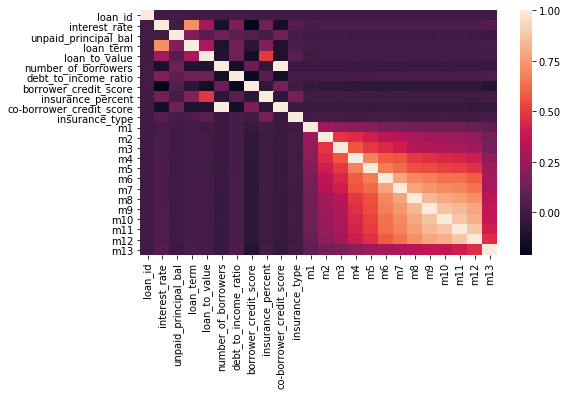

In [205]:
plt.figure(figsize=(8,4.5))
sns.heatmap(df.corr())

In [157]:
for i in range(5,20):
    cluster = k_means(df.iloc[:,16:-1],i,random_state=0)
    df['cluster'] = cluster[1]
    print('{}: {}'.format(i, df.corr()['m13']['cluster']))

5: 0.4395982991366879
6: 0.6236854545358428
7: 0.7091365923018333
8: 0.35946144472281233
9: 0.4204796296745845
10: 0.8170783208348268
11: 0.734917246008057
12: 0.76641744290165
13: 0.48715675319080143
14: 0.4544455068121722
15: 0.5977576630146023
16: 0.6219711980911239
17: 0.47209816953925476
18: 0.2926931047027855
19: 0.46807530290401167


In [216]:
from sklearn.cluster import k_means
cluster = k_means(df.iloc[:,16:-1],10, random_state=0)
df['cluster'] = cluster[1]
print(df.corr()['m13']['cluster'])

0.8170783208348268


In [159]:
df.groupby('cluster').count()['loan_id']

cluster
0    114869
1        19
2        59
3       275
4       152
5        10
6       317
7        15
8        30
9       312
Name: loan_id, dtype: int64

In [160]:
df.groupby('cluster').mean()['m13']

cluster
0    0.000000
1    0.842105
2    0.932203
3    0.003636
4    0.467105
5    1.000000
6    0.413249
7    0.800000
8    0.933333
9    1.000000
Name: m13, dtype: float64

In [192]:
df1 = pd.DataFrame()
for col in df.columns[1:]:
    if df[col].dtype == 'object':
        df1[col+'_cat'] = df[col].astype('category').cat.codes
    else:
        df1[col] = df[col]
df1.head()

,source_cat,financial_institution_cat,interest_rate,unpaid_principal_bal,loan_term,origination_date_cat,first_payment_date_cat,loan_to_value,number_of_borrowers,debt_to_income_ratio,borrower_credit_score,loan_purpose_cat,insurance_percent,co-borrower_credit_score,insurance_type,m1,m2,m3,m4,m5,m6,m7,m8,m9,m10,m11,m12,m13,cluster
0,2,18,4.250,214000,360,2,3,95,1.0,22.0,694.0,2,30.0,0.0,0.0,0,0,0,0,0,0,1,0,0,0,0,0,1,9
1,1,15,4.875,144000,360,0,1,72,1.0,44.0,697.0,1,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,1,0,1,9
2,2,17,3.250,366000,180,0,1,49,1.0,33.0,780.0,1,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,1,9
3,0,8,4.750,135000,360,1,2,46,2.0,44.0,633.0,1,0.0,638.0,0.0,0,0,0,0,0,0,0,0,1,1,1,1,1,6
4,0,8,4.750,124000,360,1,2,80,1.0,43.0,681.0,2,0.0,0.0,0.0,0,1,2,3,4,5,6,7,8,9,10,11,1,5


In [0]:
fact = list(df1.columns[:15])
fact[-1] = 'cluster'

In [208]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel
estimator = RandomForestClassifier()
selector = SelectFromModel(estimator=estimator, 
                           threshold=-np.inf, 
                           max_features=10)
selected = selector.fit_transform(X=df1[fact],y=df['m13'])

/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
